In [1]:
ls

Applications/           Pictures/               Untitled4.ipynb
Desktop/                Public/                 Untitled5.ipynb
Documents/              Untitled Folder/        Untitled6.ipynb
Downloads/              Untitled.ipynb          config
Library/                Untitled1.ipynb         iCloud Drive (Archive)/
Movies/                 Untitled2.ipynb         opt/
Music/                  Untitled3.ipynb


In [2]:
cd Desktop/Training/

/Users/admin/Desktop/Training


In [3]:
ls

0/ 1/ 2/ 3/ 4/ 5/ 6/


In [2]:
import tensorflow as tf 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("/Users/admin/Desktop/Training/0/Training_3908.jpg")

In [4]:
img_array.shape

(48, 48, 3)

In [5]:
Datadirectory = "/Users/admin/Desktop/Training/"

In [6]:
Classes = ["0","1","2","3","4","5","6"]

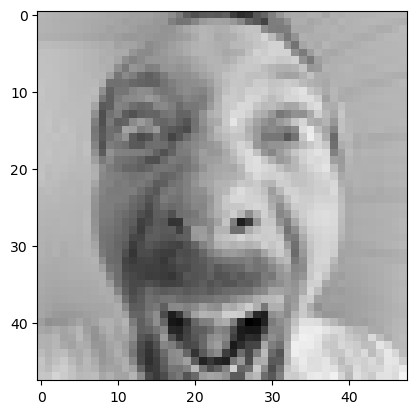

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

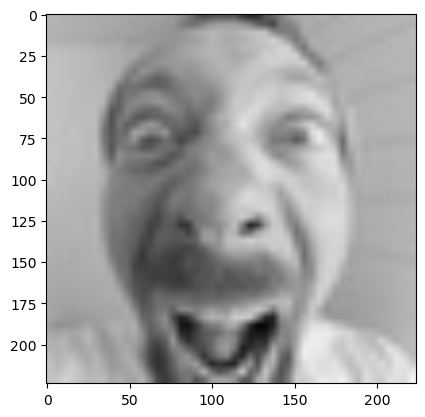

In [8]:
img_size = 224 
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path =os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try :
                img_array =cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                 pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

28709


In [13]:
temp = np.array(training_Data)

/var/folders/8p/m5r9d2r171d31v15tpmh78gm0000gn/T/ipykernel_36437/2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [14]:
import random
random.shuffle(training_Data)

In [15]:
x = []
y = []
for features,label in training_Data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1,img_size,img_size,3)


In [16]:
x.shape

(28709, 224, 224, 3)

In [17]:
x = x/255.0;

In [18]:
y[3]

3

In [19]:
type(y)

list

In [20]:
y = np.array(y)

In [21]:
y.shape

(28709,)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2() ##pre-trained Model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [37]:
#tranfer learning - tuning,weights will start from last check point


In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [29]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation ='softmax')(final_output)

In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras.Model(inputs =base_input, outputs = final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [33]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [47]:
new_model.fit(x,y,epochs =25)

Epoch 1/25
898/898 [==============================] - 3266s 4s/step - loss: 1.2462 - accuracy: 0.5288
Epoch 2/25
898/898 [==============================] - 2544s 3s/step - loss: 1.0744 - accuracy: 0.5974
Epoch 3/25
898/898 [==============================] - 2481s 3s/step - loss: 0.9999 - accuracy: 0.6251
Epoch 4/25
898/898 [==============================] - 2492s 3s/step - loss: 0.9432 - accuracy: 0.6488
Epoch 5/25
898/898 [==============================] - 2580s 3s/step - loss: 0.8872 - accuracy: 0.6733
Epoch 6/25
898/898 [==============================] - 6248s 7s/step - loss: 0.8371 - accuracy: 0.6909
Epoch 7/25
898/898 [==============================] - 9819s 11s/step - loss: 0.7867 - accuracy: 0.7114
Epoch 8/25
898/898 [==============================] - 2458s 3s/step - loss: 0.7354 - accuracy: 0.7293
Epoch 9/25
898/898 [==============================] - 2355s 3s/step - loss: 0.6813 - accuracy: 0.7507
Epoch 10/25
898/898 [==============================] - 2331s 3s/step - loss: 0.63

In [34]:
new_model.save('Final_model_95po7.h5')

In [34]:
new_model = tf.keras.models.load_model('Final_model_95po7.h5')

In [ ]:
new_model.evaluate

In [36]:
frame = cv2.imread("/Users/admin/Desktop/B.jpg")

In [37]:
frame.shape

(1333, 2000, 3)

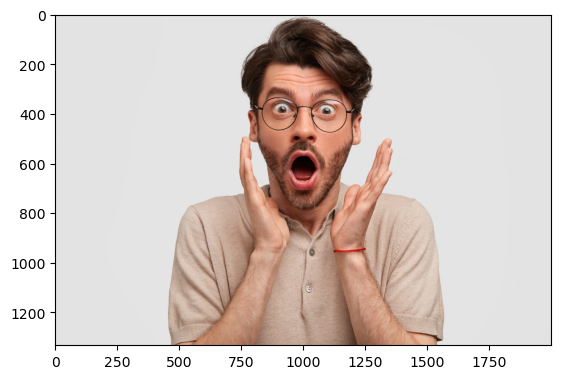

In [38]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [39]:
faceCascade = cv2.CascadeClassifier('/Users/admin/Desktop/haarcascade_frontalface_default.xml')

In [40]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(1333, 2000)

In [42]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh + ew]

Face not Detected


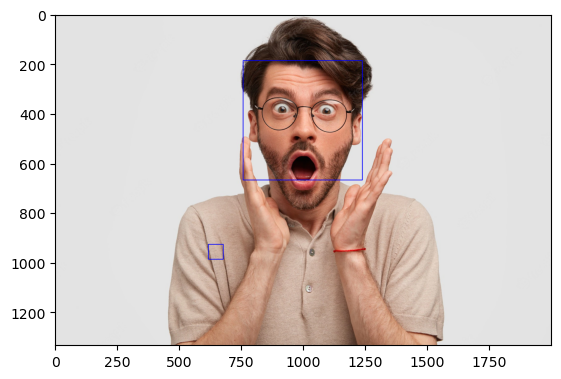

In [43]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

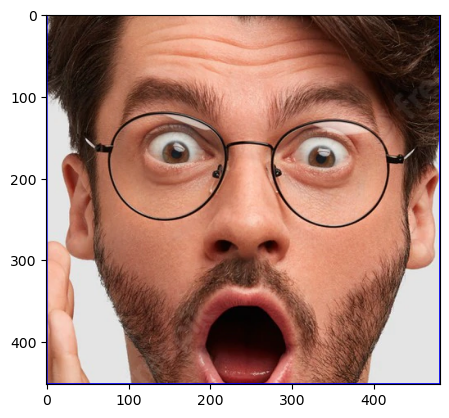

In [44]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [45]:
final_image =cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [46]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 555ms/step


In [47]:
Predictions[0]

array([0.14289989, 0.12649022, 0.08456259, 0.1188733 , 0.3307658 ,
       0.12937415, 0.06703406], dtype=float32)

In [48]:
np.argmax(Predictions)

4

realtime


In [56]:
import cv2
import numpy as np
path = "/Users/admin/Desktop/haarcascade_frontalface_default.xml"
font_scale =1.5
font = cv2.FONT_HERSHEY_PLAIN


rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = "some text in a box"

(text_width,text_height) = cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y),(text_offset_x + text_width + 2,text_offset_y - text_height -2))
cv2.rectangle(img,box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier('/Users/admin/Desktop/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not Detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh ,ex:ex+ ew]
    
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image=final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Prediction = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1, x1), (x1 + w1, y1 + h1),(0,0,0), -1)
        
        cv2.putText(frame, status,(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x, y), (x+w, y+h),(0, 0, 255))
    
    elif(np.argmax(Predictions)==1):
        status = "Disgust"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1, x1), (x1 + w1, y1 + h1),(0,0,0), -1)
        
        cv2.putText(frame, status,(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x, y), (x+w, y+h),(0, 0, 255))
        
    elif(np.argmax(Predictions)==2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1, x1), (x1 + w1, y1 + h1),(0,0,0), -1)
        
        cv2.putText(frame, status,(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x, y), (x+w, y+h),(0, 0, 255))
        
    elif(np.argmax(Predictions)==3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1, x1), (x1 + w1, y1 + h1),(0,0,0), -1)
        
        cv2.putText(frame, status,(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x, y), (x+w, y+h),(0, 0, 255))
        
    elif(np.argmax(Predictions)==4):
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1, x1), (x1 + w1, y1 + h1),(0,0,0), -1)
        
        cv2.putText(frame, status,(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x, y), (x+w, y+h),(0, 0, 255))
        
    elif(np.argmax(Predictions)==5):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1, x1), (x1 + w1, y1 + h1),(0,0,0), -1)
        
        cv2.putText(frame, status,(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x, y), (x+w, y+h),(0, 0, 255))
        
    else:
        status = "surprise"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1, x1), (x1 + w1, y1 + h1),(0,0,0), -1)
        
        cv2.putText(frame, status,(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0), 2)
        
        cv2.putText(frame,status,(100, 150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x, y), (x+w, y+h),(0, 255, 0))
        
    
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyALLWindows()

        

OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


1/1 [==============================] - 0s 38ms/step


KeyboardInterrupt: 